In [1]:
 %matplotlib inline
import os
from datetime import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('weekly_in_situ_co2_mlo.csv', skiprows=44, names=['date', 'concentration'])
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data = data.sort_values(by=['date'])
data.head()

date  concentration
0 1958-03-29         316.19
1 1958-04-05         317.31
2 1958-04-12         317.69
3 1958-04-19         317.58
4 1958-04-26         316.48

In [3]:
data_year = []

for year in range(data['date'].iloc[0].year, data['date'].iloc[-1].year + 1):
    data_year.append([datetime(year, 1, 1), data[data['date'].dt.year == year]['concentration'].mean()])
    
data_year = pd.DataFrame(data_year, columns=['year', 'concentration'])
data_year.head()

year  concentration
0 1958-01-01     315.474000
1 1959-01-01     315.945417
2 1960-01-01     316.898868
3 1961-01-01     317.634038
4 1962-01-01     318.597708

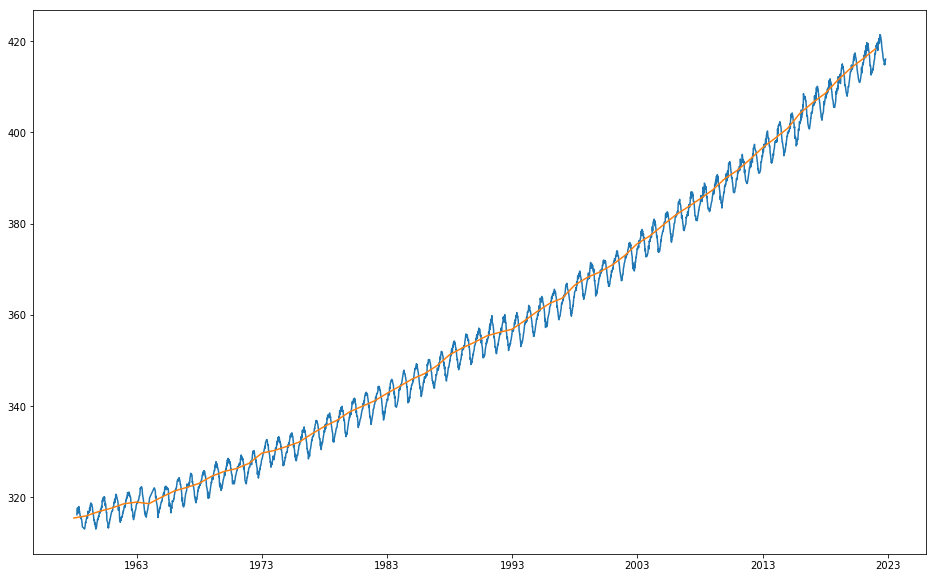

In [5]:
plt.figure(figsize=(16,10))
plt.plot(data['date'], data['concentration'])
plt.plot(data_year['year'], data_year['concentration'])
plt.show()

## Prédiction

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data_year['year'].dt.year, data_year['concentration'])

def predict(x):
    return slope * x + intercept

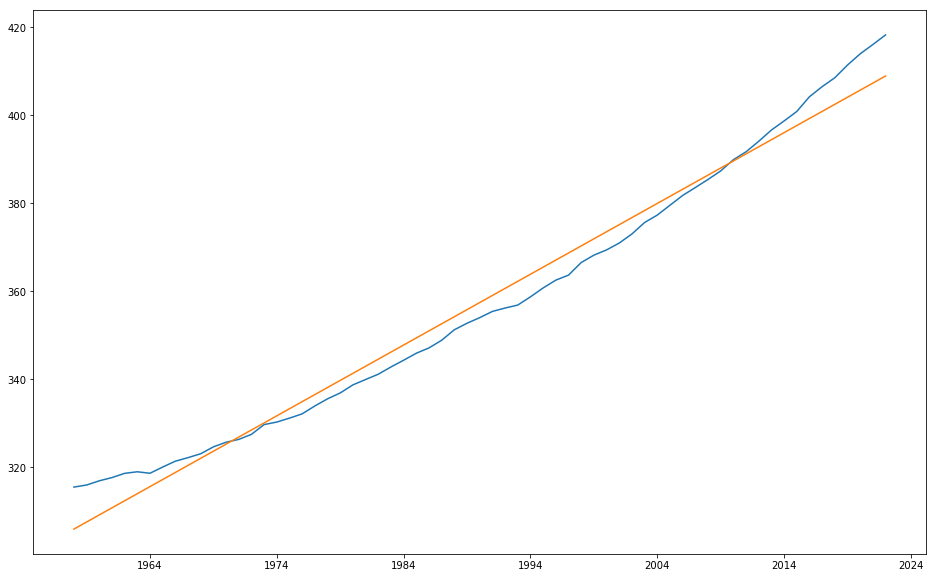

In [11]:
plt.figure(figsize=(16,10))
plt.plot(data_year['year'], data_year['concentration'])
plt.plot(data_year['year'], [predict(year) for year in data_year['year'].dt.year])
plt.show()

In [12]:
predict(2025)

413.75316542940527